# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

### Importando as Bibliotecas e carregando os datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Criando dataframes separados para X e y
X = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
y = pd.DataFrame(target, columns=['MEDV'])

# Visualizando X e y
print("X:")
print(X.head())
print("\ny:")
print(y.head())





X:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

y:
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

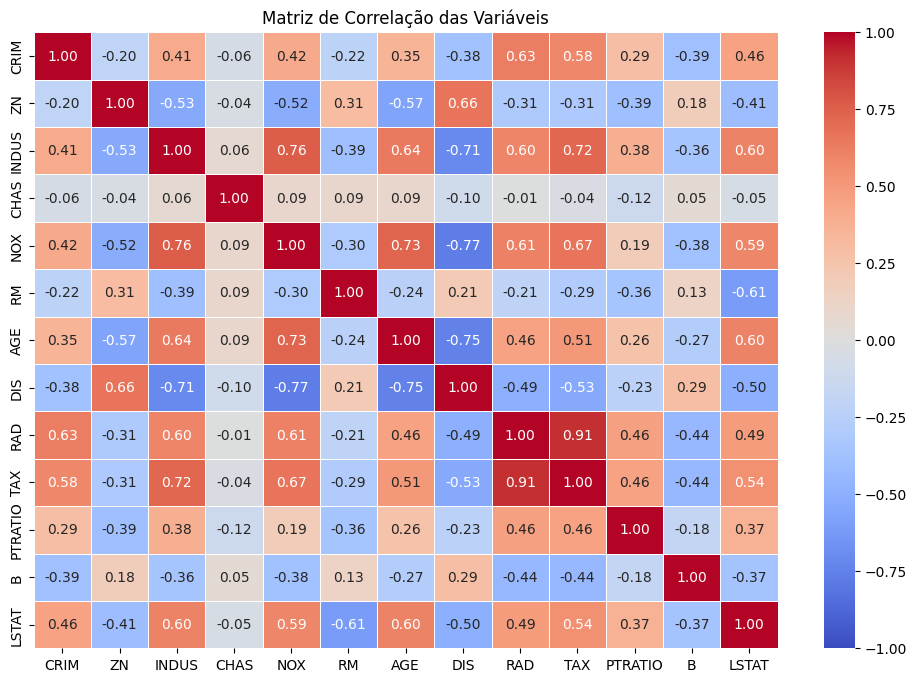

In [2]:
# Calcular a matriz de correlação
correlation_matrix = X.corr()

# Plotar a matriz de correlação usando heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()


In [4]:
# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escolher um modelo de regressão (usaremos Regressão Linear)
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Avaliar o desempenho do modelo com os dados de teste
y_pred = model.predict(X_test)

# Calculando as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE (Erro Quadrático Médio):", mse)
print("R^2 (Coeficiente de Determinação):", r2)


MSE (Erro Quadrático Médio): 24.291119474973478
R^2 (Coeficiente de Determinação): 0.6687594935356326


### 3. Separe os dados em validação e teste

In [5]:
# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir o conjunto de treinamento em conjunto de treinamento e conjunto de validação
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.25, random_state=42)

# Exibir as dimensões dos conjuntos resultantes
print("Dimensões do conjunto de treinamento:", X_train.shape)
print("Dimensões do conjunto de validação:", X_val.shape)
print("Dimensões do conjunto de teste:", X_test.shape)


Dimensões do conjunto de treinamento: (303, 13)
Dimensões do conjunto de validação: (101, 13)
Dimensões do conjunto de teste: (102, 13)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [8]:
# Treinar a primeira árvore com profundidade máxima = 8
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [7]:
# Treinar a segunda árvore com profundidade máxima = 2
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [9]:
# Calcular o MSE para a primeira árvore (profundidade máxima = 8)
mse_tree_max_depth_8_train = mean_squared_error(y_train, tree_max_depth_8.predict(X_train))
mse_tree_max_depth_8_test = mean_squared_error(y_test, tree_max_depth_8.predict(X_test))

# Calcular o MSE para a segunda árvore (profundidade máxima = 2)
mse_tree_max_depth_2_train = mean_squared_error(y_train, tree_max_depth_2.predict(X_train))
mse_tree_max_depth_2_test = mean_squared_error(y_test, tree_max_depth_2.predict(X_test))

# Exibir os resultados
print("MSE para a primeira árvore (profundidade máxima = 8):")
print("  - Base de treinamento:", mse_tree_max_depth_8_train)
print("  - Base de teste:", mse_tree_max_depth_8_test)
print("\nMSE para a segunda árvore (profundidade máxima = 2):")
print("  - Base de treinamento:", mse_tree_max_depth_2_train)
print("  - Base de teste:", mse_tree_max_depth_2_test)


MSE para a primeira árvore (profundidade máxima = 8):
  - Base de treinamento: 1.4566187389487937
  - Base de teste: 28.921433542827568

MSE para a segunda árvore (profundidade máxima = 2):
  - Base de treinamento: 23.122086648660932
  - Base de teste: 27.976621979198132


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

### Para a primeira árvore (profundidade máxima = 8):

*   MSE para a base de treinamento: 1.457
*   MSE para a base de teste: 28.921

### Para a segunda árvore (profundidade máxima = 2):

*   MSE para a base de treinamento: 23.122
*   MSE para a base de teste: 27.977


Podemos observar que a primeira árvore (com profundidade máxima = 8) tem um MSE significativamente menor para a base de treinamento em comparação com a segunda árvore (profundidade máxima = 2), o que sugere um ajuste melhor aos dados de treinamento. No entanto, a diferença entre o MSE da base de treinamento e o MSE da base de teste é muito maior para a primeira árvore, indicando uma maior probabilidade de superajuste (overfitting) aos dados de treinamento.

Por outro lado, embora a segunda árvore tenha um MSE maior para a base de treinamento, seu MSE para a base de teste é praticamente o mesmo, sugerindo uma melhor capacidade de generalização para novos dados.

Portanto, com base nos resultados, a segunda árvore (com profundidade máxima = 2) parece ser mais adequada, pois tem um desempenho semelhante na base de teste e é menos propensa a superajustar os dados de treinamento.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

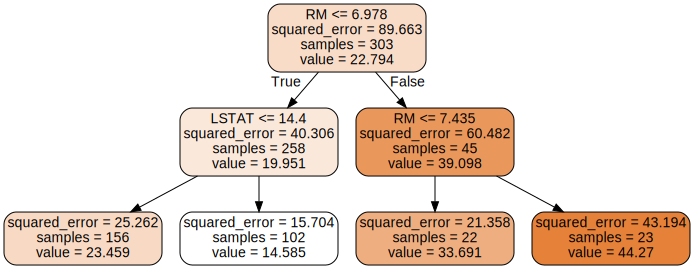

In [10]:
# Exportar a árvore para um arquivo DOT
export_graphviz(tree_max_depth_2, out_file='tree_max_depth_2.dot', feature_names=X.columns, filled=True, rounded=True)

# Renderizar a árvore a partir do arquivo DOT
with open('tree_max_depth_2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


### Insight:

### Analisando os nós e divisões da árvore de decisão.



1.   O primeiro nó de divisão é baseado na característica RM (número médio de quartos por habitação) com um limiar de 6.978. Isso significa que o modelo está dividindo os dados com base no número médio de quartos por habitação.

2.   O segundo nó de divisão é baseado na característica LSTAT que representa o percentual do status inferior da população com um limiar de 14.4. Isso indica que, após a primeira divisão, os dados são divididos novamente com base no percentual de status inferior da população.

3.   A decisão "True" ou "False" em cada nó indica qual ramo da árvore seguir após a divisão.

4.   Os valores fornecidos após "squared_error" são os erros quadráticos correspondentes àquele nó específico.

5.   Os valores fornecidos após "samples" indicam o número de amostras que alcançaram aquele nó durante o processo de construção da árvore.


6.   Os valores fornecidos após "value" indicam o valor de destino médio das amostras que alcançaram aquele nó.

### Podemos observar que as características mais relevantes na árvore são RM e LSTAT, pois são as características usadas nas divisões iniciais e têm um impacto significativo na predição do valor mediano das casas ocupadas pelo proprietário (MEDV).